# Real Estate (99acres.com) Model Building

1. Import sklearn Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

2. Import Dataset

In [3]:
mum_prop = pd.read_csv('Final_Project.csv')
mum_prop

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Malad Mumbai,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2526,Shagun White Woods,Sector 23 Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1180.0,10338,2,2,2,122.0
2527,Guru Anant,Sector 2 Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,0 to 1 Year,Ready To Move,Built Up Area,1090.0,8073,11,2,2,88.0
2528,Balaji Mayuresh Delta,Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1295.0,10579,6,2,2,137.0
2529,Balaji Mayuresh Delta,Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1850.0,9243,6,3,3,171.0


3. Data Understanding

In [4]:
mum_prop.shape

(2531, 12)

In [5]:
mum_prop.isna().sum()

Property_Name    0
Location         0
Region           0
Property_Age     0
Availability     0
Area_Tpye        0
Area_SqFt        0
Rate_SqFt        0
Floor_No         0
Bedroom          0
Bathroom         0
Price_Lakh       0
dtype: int64

In [6]:
mum_prop.describe().round()

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2531.0,2531.0,2531.0,2531.0,2531.0,2531.0
mean,949.0,16554.0,9.0,2.0,2.0,161.0
std,487.0,10204.0,8.0,1.0,1.0,162.0
min,185.0,1808.0,-1.0,1.0,1.0,13.0
25%,634.0,8751.0,3.0,1.0,2.0,66.0
50%,850.0,13636.0,6.0,2.0,2.0,110.0
75%,1150.0,22314.0,12.0,2.0,2.0,197.0
max,5000.0,55611.0,55.0,6.0,7.0,1900.0


# 4. Feature Engineering

4.1 Drop Unwanted Columns

In [7]:
mum_prop.drop(columns=['Property_Name', 'Location','Availability','Bathroom'], inplace =  True)
print('Shape of data :', mum_prop.shape)

Shape of data : (2531, 8)


4.2 Label Encoding for Categorical Columns

In [8]:
le = LabelEncoder()

In [9]:
for column in mum_prop.describe(include='object').columns:
    mum_prop[column] = le.fit_transform(mum_prop[column])

In [10]:
mum_prop.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Region,2531.0,67.56,40.60,0.0,31.0,60.0,107.0,144.0
Property_Age,2531.0,1.30,1.09,0.0,0.0,1.0,2.0,4.0
Area_Tpye,2531.0,1.74,1.18,0.0,1.0,1.0,3.0,3.0
Area_SqFt,2531.0,948.77,486.83,185.0,634.5,850.0,1150.0,5000.0
Rate_SqFt,2531.0,16553.69,10204.27,1808.0,8751.0,13636.0,22314.0,55611.0
Floor_No,2531.0,8.78,7.98,-1.0,3.0,6.0,12.0,55.0
Bedroom,2531.0,1.95,0.83,1.0,1.0,2.0,2.0,6.0
Price_Lakh,2531.0,161.35,162.32,13.0,66.0,110.0,197.0,1900.0


In [11]:
mum_prop

,Region,Property_Age,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Price_Lakh
0,69,0,3,2900.0,17241,14,3,500.0
1,73,1,3,1900.0,12631,8,3,240.0
2,24,2,3,595.0,15966,3,1,95.0
3,18,3,0,1450.0,25862,1,3,375.0
4,107,3,1,876.0,39954,5,2,350.0
...,...,...,...,...,...,...,...,...
2526,130,1,0,1180.0,10338,2,2,122.0
2527,130,0,0,1090.0,8073,11,2,88.0
2528,130,1,0,1295.0,10579,6,2,137.0
2529,130,1,0,1850.0,9243,6,3,171.0


In [12]:
mum_prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 2530
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        2531 non-null   int32  
 1   Property_Age  2531 non-null   int32  
 2   Area_Tpye     2531 non-null   int32  
 3   Area_SqFt     2531 non-null   float64
 4   Rate_SqFt     2531 non-null   int64  
 5   Floor_No      2531 non-null   int64  
 6   Bedroom       2531 non-null   int64  
 7   Price_Lakh    2531 non-null   float64
dtypes: float64(2), int32(3), int64(3)
memory usage: 148.3 KB


4.3 Looking for Minimum & Maximum

In [13]:
for i in mum_prop.columns:  
    print(i,'Min value :', mum_prop[i].min(),'Max value :', mum_prop[i].max())

Region Min value : 0 Max value : 144
Property_Age Min value : 0 Max value : 4
Area_Tpye Min value : 0 Max value : 3
Area_SqFt Min value : 185.0 Max value : 5000.0
Rate_SqFt Min value : 1808 Max value : 55611
Floor_No Min value : -1 Max value : 55
Bedroom Min value : 1 Max value : 6
Price_Lakh Min value : 13.0 Max value : 1900.0


4.4 Correlation Heatmap

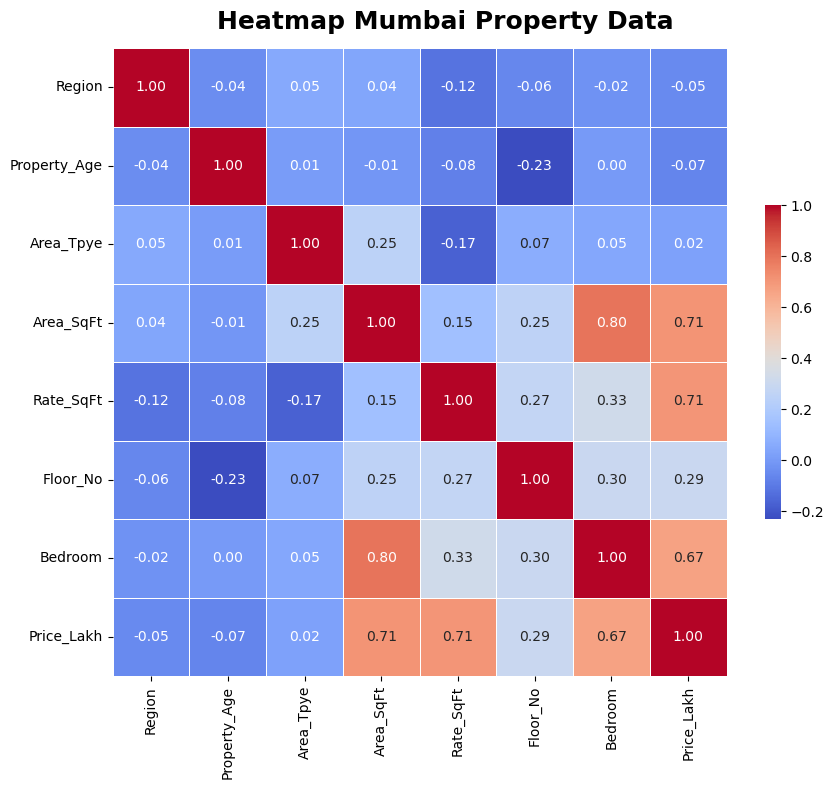

In [14]:
fig = plt.figure( figsize =(9,8))
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
sns.heatmap(mum_prop.corr(),annot = True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2f', cmap='coolwarm')
fig.suptitle('Heatmap Mumbai Property Data',fontsize=18, fontweight="bold")
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Heatmap_Encoding', dpi = 250)

# 5. Model Building

In [15]:
mum_prop.head()

,Region,Property_Age,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Price_Lakh
0,69,0,3,2900.0,17241,14,3,500.0
1,73,1,3,1900.0,12631,8,3,240.0
2,24,2,3,595.0,15966,3,1,95.0
3,18,3,0,1450.0,25862,1,3,375.0
4,107,3,1,876.0,39954,5,2,350.0


# split data

In [16]:
X =  mum_prop.drop('Price_Lakh', axis = 1)
y =  mum_prop['Price_Lakh']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 12)

In [18]:
print(X_train.shape, X_test.shape)

(2024, 7) (507, 7)


In [19]:
X_train

,Region,Property_Age,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom
1990,107,1,3,1108.0,24368,12,2
1865,80,0,1,671.0,29657,10,2
537,18,1,1,762.0,48556,16,2
551,13,3,1,750.0,22666,13,2
1928,27,0,0,400.0,4750,3,1
...,...,...,...,...,...,...,...
1987,118,0,3,845.0,23313,1,2
1283,80,0,1,1330.0,34736,16,3
1414,69,3,1,669.0,21001,13,2
1691,11,0,1,1370.0,21897,7,3


# feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

5.2 Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)


print("Test Accuracy     = ", linear.score(X_test, y_test))

Test Accuracy     =  0.8696528670699647


5.3 Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_split=2,criterion='absolute_error')
dt.fit(X_train, y_train)

print("Test Accuracy     = ", dt.score(X_test, y_test))

Test Accuracy     =  0.9677577413282225


# cv (cross validation use)

In [23]:
from sklearn.model_selection import cross_val_score
score_ds_cv = cross_val_score(DecisionTreeRegressor(min_samples_split=2,criterion='absolute_error'),X_test,y_test,cv=5)
print(score_ds_cv)
print("average accuracy is : ",np.average(score_ds_cv))

[0.95045369 0.93257584 0.90343312 0.88864082 0.83159896]
average accuracy is :  0.9013404866003153


# 6.1 Visualizing Results

In [24]:
pred = dt.predict(X_test)

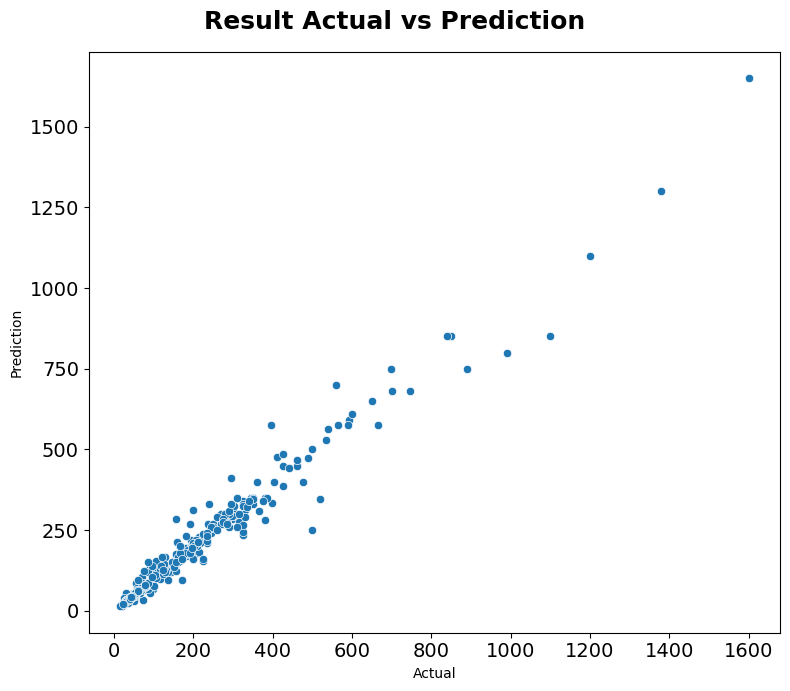

In [25]:
fig = plt.figure(figsize=(8,7))

sns.scatterplot(x=y_test,y=pred)
fig.suptitle('Result Actual vs Prediction', fontsize= 18 , fontweight='bold')
plt.xlabel("Actual")
plt.ylabel("Prediction")
pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

#fig.savefig('Prediction_Polynomial', dpi = 500)

In [26]:
print(list(X.loc[37]))

[18.0, 1.0, 3.0, 802.0, 22443.0, 20.0, 2.0]


In [27]:
print(y.loc[37])

180.0


# 7. Model Deployement

In [28]:
input_data=(18.0, 1.0, 3.0, 802.0, 22443.0, 20.0, 2.0)
input_data_np = np.array(input_data)        # convert input_data into 1d array form

input_data_re = input_data_np.reshape(1,-1)  # array form data reshape in -1 x 1 

s_data = sc.transform(input_data_re)

pred = dt.predict(s_data)
print('property price is : ',pred, 'lakh')

property price is :  [180.] lakh


The End !!!